In [44]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.tsa.stattools import coint
from statsmodels.regression.rolling import RollingOLS

import yfinance as yf
import seaborn
import matplotlib.pyplot as plt

In [63]:
symbol_list = ['RELIANCE.NS','MGL.NS','ATGL.NS','BPCL.NS','HINDPETRO.NS','PETRONET.NS','CASTROLIND.NS','IOC.NS','GAIL.NS']
data = yf.download(
    symbol_list, 
    start='2023-01-05', 
    end='2024-01-05'
)['Close']

[*********************100%***********************]  9 of 9 completed


In [64]:
total=len(data)
total

246

In [65]:
data.head()

,ATGL.NS,BPCL.NS,CASTROLIND.NS,GAIL.NS,HINDPETRO.NS,IOC.NS,MGL.NS,PETRONET.NS,RELIANCE.NS
Date,,,,,,,,,
2023-01-05,3633.699951,342.350006,128.000000,97.349998,245.949997,79.099998,867.349976,220.500000,2514.050049
2023-01-06,3555.399902,344.700012,125.599998,97.250000,249.899994,80.050003,859.549988,217.899994,2536.899902
2023-01-09,3629.000000,346.750000,124.099998,98.449997,245.149994,80.099998,869.400024,219.300003,2596.800049
2023-01-10,3656.399902,347.350006,125.849998,98.099998,249.199997,80.599998,868.049988,219.850006,2558.399902
2023-01-11,3616.500000,352.500000,125.449997,97.300003,256.450012,83.550003,867.400024,220.500000,2526.149902


In [66]:
data.tail()

,ATGL.NS,BPCL.NS,CASTROLIND.NS,GAIL.NS,HINDPETRO.NS,IOC.NS,MGL.NS,PETRONET.NS,RELIANCE.NS
Date,,,,,,,,,
2023-12-29,987.950012,450.649994,179.750000,162.100006,398.899994,129.850006,1200.500000,222.649994,2584.949951
2024-01-01,1000.950012,452.049988,191.699997,166.199997,399.600006,130.300003,1203.650024,225.600006,2590.250000
2024-01-02,1000.900024,456.250000,189.000000,164.050003,408.700012,130.550003,1215.900024,226.649994,2611.699951
2024-01-03,1099.300049,461.049988,189.300003,162.149994,421.799988,132.699997,1222.000000,228.300003,2583.300049
2024-01-04,1115.099976,452.649994,193.250000,163.149994,415.399994,131.199997,1228.300049,232.050003,2596.649902


In [67]:
#to find the number of missingg vaLUES
num_missing_values = data.isnull().sum().sum()
print(num_missing_values)

0


In [68]:
# to check the dates having missing values ( in case if any)
dates_with_missing_values = data[data.isnull().any(axis=1)].index
print(dates_with_missing_values)

DatetimeIndex([], dtype='datetime64[ns]', name='Date', freq=None)


In [69]:
#accessing the specific values in the dataset by the date(26th january checking for holiday)
data.index = pd.to_datetime(data.index)

specific_date = '2023-06-28'
data_specific_date = data[data.index == specific_date]
print(data_specific_date)

            ATGL.NS     BPCL.NS  CASTROLIND.NS     GAIL.NS  HINDPETRO.NS  \
Date                                                                       
2023-06-28    641.5  360.350006     121.599998  104.300003         267.0   

               IOC.NS       MGL.NS  PETRONET.NS  RELIANCE.NS  
Date                                                          
2023-06-28  89.349998  1045.650024   220.100006  2496.449951  


In [70]:
#filling the missing value with the mean of preceeding and suceeding one
data = data.fillna((data.ffill() + data.bfill()) / 2)

In [71]:
#to find the number of missingg vaLUES
num_missing_values = data.isnull().sum().sum()
print(num_missing_values)

0


In [72]:
#Finding cointegrated pairs
cointegrated_pairs = []

for i in range(len(symbol_list)):
    for j in range(i + 1, len(symbol_list)):
        stock1 = data[symbol_list[i]]
        stock2 = data[symbol_list[j]]
        result =  sm.tsa.coint(stock1, stock2)#cointegration test
        p_value = result[1] #p less than 0.05 are considered to be cointegrated
        
        if p_value < 0.05:  # Adjust the significance level as needed
            cointegrated_pairs.append((symbol_list[i], symbol_list[j], p_value))
# Step 2: Sort the cointegrated pairs by the p-value (ascending order)
cointegrated_pairs.sort(key=lambda x: x[2])

# Step 3: Print the single pair with the lowest p-value
if cointegrated_pairs:
    lowest_pvalue_pair = cointegrated_pairs[0]
    stock1, stock2, p_value = lowest_pvalue_pair
    print(f"The cointegrated pair with the lowest p-value is: {stock1} and {stock2}, p-value: {p_value}")
else:
    print("No cointegrated pairs found.")

The cointegrated pair with the lowest p-value is: ATGL.NS and HINDPETRO.NS, p-value: 0.0007649906353749514


[*********************100%***********************]  2 of 2 completed


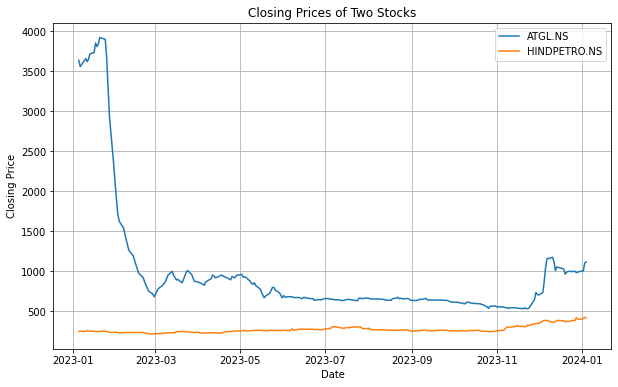

In [74]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the list of symbols
symbol_list = ['ATGL.NS', 'HINDPETRO.NS']

# Download the data
data = yf.download(symbol_list, start='2023-01-05', end='2024-01-05')['Close']

# Plot the graph
plt.figure(figsize=(10, 6))
for symbol in symbol_list:
    plt.plot(data.index, data[symbol], label=symbol)

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Two Stocks')
plt.legend()
plt.grid(True)
plt.show()


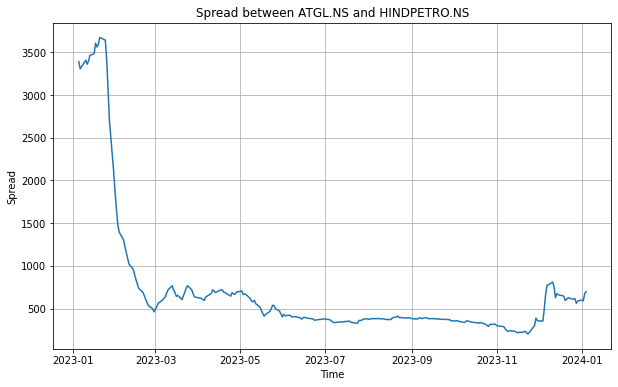

In [75]:
import matplotlib.pyplot as plt

# Select the pair for which you want to plot the spread
pair = cointegrated_pairs[0]  # Select the first pair, you can change the index as needed

spread = data[pair[0]] - data[pair[1]]
# Plot the spread
plt.figure(figsize=(10, 6))
plt.plot(spread)
plt.title(f"Spread between {stock1} and {stock2}")
plt.xlabel("Time")
plt.ylabel("Spread")
plt.grid(True)
plt.show()


In [76]:
# Perform the ADF test
from statsmodels.tsa.stattools import adfuller
result = adfuller(spread)
p_value = result[1]
print(p_value)
if p_value < 0.05:
    print("Spread is Stationary")
else:
    print("Spread is not stationary")

0.0010678856905779585
Spread is Stationary


In [77]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Assuming you have already calculated the spread and stored it in a variable called 'spread'

# Perform Augmented Dickey-Fuller (ADF) test
result = adfuller(spread)
print(result)
adf_statistic = result[0]
p_value = result[1]

# Check for mean reversion
if adf_statistic < result[4]['5%'] and p_value < 0.05:
    print("The spread exhibits mean-reverting behavior")
else:
    print("The spread does not exhibit mean-reverting behavior")


(-4.074259169862225, 0.0010678856905779585, 3, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 2175.260745129707)
The spread exhibits mean-reverting behavior


In [78]:
# Step 1: Calculate Z-score
z_score = (spread - spread.mean()) / spread.std()
print(z_score)

Date
2023-01-05    3.496441
2023-01-06    3.389234
2023-01-09    3.491357
2023-01-10    3.521792
2023-01-11    3.460336
                ...   
2023-12-29   -0.151461
2024-01-01   -0.135428
2024-01-02   -0.147355
2024-01-03   -0.036172
2024-01-04   -0.007236
Length: 246, dtype: float64


In [82]:
# Step 4: Determine entry and exit criteria
entry_threshold = float(input("Enter a entry threshold"))
exit_threshold = float(input("Enter a exit threshold"))

# Step 5: Backtest the strategy
signals = np.zeros_like(spread)
signals[z_score > entry_threshold] = -1  # Sell signal
signals[z_score < -entry_threshold] = 1  # Buy signal
signals[np.abs(z_score) < exit_threshold] = 0  # Exit signal
print(signals)

positions = np.zeros_like(spread)
positions[0] = signals[0]  # Initial position
for i in range(1, len(signals)):
    positions[i] = positions[i-1]  # Maintain previous position if no signal
    if signals[i] == -1:  # Sell signal
        positions[i] = -1
    elif signals[i] == 1:  # Buy signal
        positions[i] = 1

trades = positions - np.roll(positions, 1)
trades[0] = positions[0]  # First trade is the initial position


# Step 6: Execute real-time trading (example with today's data)
current_spread = data[pair[0]].iloc[-1] - data[pair[1]].iloc[-1]
current_z_score = (current_spread - np.mean(spread)) / np.std(spread)

if current_z_score > entry_threshold:
    print("Sell", pair[0], "and Buy", pair[1] ,end='')
elif current_z_score < exit_threshold:
    print("Buy", pair[0], "and Sell", pair[1])
else:
    print("No trading signal")

# Step 7: Monitor and evaluate the algorithm's performance
# Continuously review, analyze, and improve the strategy


Enter a entry threshold0.5
Enter a exit threshold-0.5
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1. -1. -1. -1. -1. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  

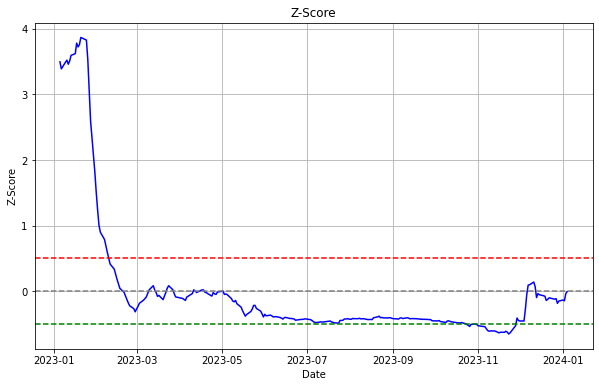

In [83]:
import matplotlib.pyplot as plt

# Assuming you have already calculated the Z-score and stored it in a variable called 'z_score'

# Plot the Z-score
plt.figure(figsize=(10, 6))
plt.plot(z_score.index, z_score, color='blue')
plt.axhline(0, color='gray', linestyle='--')
plt.axhline(entry_threshold, color='red', linestyle='--')
plt.axhline(exit_threshold, color='green', linestyle='--')
plt.title('Z-Score')
plt.xlabel('Date')
plt.ylabel('Z-Score')
plt.grid(True)
plt.show()


In [84]:
if current_z_score>entry_threshold:
    buy_price=data[pair[1]].iloc[-1]
    sell_price=data[pair[0]].iloc[-1]
    print("sell",pair[0],sell_price,"\n"
         "buy",pair[1],buy_price)
    
elif current_z_score < exit_threshold:
    buy_price = data[pair[0]].iloc[-1]
    sell_price = data[pair[1]].iloc[-1]
    print("buy",pair[0],buy_price,"\n"
          "sell",pair[1],sell_price)
else:
    print("NO trading Siganls")

NO trading Siganls


Exit the trade when z-score reaches to the mean
Entering the trade: Traders decide to enter the trade by either buying a stock or selling a stock..
    Existing the trade : If in long position traders exit the trade by selling the stock,
        For a short position, traders exit by buying back the asset.